In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_data = pd.read_csv(r"C:/Users/ammanana/Desktop/technocolabs/prosper_loan_data.csv")

In [3]:
loan_data.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,ListingNumber,Term,ListingCategory (numeric),...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,year
0,C,Completed,not available,CO,Other,Self-employed,"$25,000-49,999",193129,36,0,...,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,2007-01-01
1,not available,Current,A,CO,Professional,Employed,"$50,000-74,999",1209647,36,2,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,2014-01-01
2,HR,Completed,not available,GA,Other,Not available,Not displayed,81716,36,0,...,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,2007-01-01
3,not available,Current,A,GA,Skilled Labor,Employed,"$25,000-49,999",658116,36,16,...,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,2012-01-01
4,not available,Current,D,MN,Executive,Employed,"$100,000+",909464,36,2,...,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,2013-01-01


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CreditGrade                          113937 non-null  object 
 1   LoanStatus                           113937 non-null  object 
 2   ProsperRating (Alpha)                113937 non-null  object 
 3   BorrowerState                        113937 non-null  object 
 4   Occupation                           113937 non-null  object 
 5   EmploymentStatus                     113937 non-null  object 
 6   IncomeRange                          113937 non-null  object 
 7   ListingNumber                        113937 non-null  int64  
 8   Term                                 113937 non-null  int64  
 9   ListingCategory (numeric)            113937 non-null  int64  
 10  OpenRevolvingAccounts                113937 non-null  int64  
 11  LoanCurrentDa

In [5]:
loan_data.drop(labels=['year','ListingNumber'],inplace=True,axis=1)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 68 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CreditGrade                          113937 non-null  object 
 1   LoanStatus                           113937 non-null  object 
 2   ProsperRating (Alpha)                113937 non-null  object 
 3   BorrowerState                        113937 non-null  object 
 4   Occupation                           113937 non-null  object 
 5   EmploymentStatus                     113937 non-null  object 
 6   IncomeRange                          113937 non-null  object 
 7   Term                                 113937 non-null  int64  
 8   ListingCategory (numeric)            113937 non-null  int64  
 9   OpenRevolvingAccounts                113937 non-null  int64  
 10  LoanCurrentDaysDelinquent            113937 non-null  int64  
 11  LoanMonthsSin

In [7]:
y = loan_data['Status']
x = loan_data.drop('Status',axis=1)

### Data Encoding

In [8]:
categorical_data = x.select_dtypes(include=['object'])
categorical_data.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,C,Completed,not available,CO,Other,Self-employed,"$25,000-49,999"
1,not available,Current,A,CO,Professional,Employed,"$50,000-74,999"
2,HR,Completed,not available,GA,Other,Not available,Not displayed
3,not available,Current,A,GA,Skilled Labor,Employed,"$25,000-49,999"
4,not available,Current,D,MN,Executive,Employed,"$100,000+"


In [9]:
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)

In [10]:
categorical_data.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,3,2,7,5,35,7,3
1,8,3,0,5,41,0,4
2,6,2,7,10,35,2,6
3,8,3,0,10,50,0,3
4,8,3,4,23,19,0,2


In [11]:
numerical_data = x.select_dtypes(include=['int','float'])
numerical_data.head()

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,36,0,1,0,78,19141,9425,0,0,258,...,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0
1,36,2,13,0,0,134815,10000,0,0,1,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0
2,36,0,0,0,86,6466,3001,0,0,41,...,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0
3,36,16,7,0,16,77296,10000,0,0,158,...,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0
4,36,2,6,0,6,102670,15000,0,0,20,...,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

numerical_data_rescaled = pd.DataFrame(scaler.fit_transform(numerical_data), 
                                    columns = numerical_data.columns, 
                                    index = numerical_data.index)

numerical_data_rescaled.head()

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,-0.462837,-0.694111,-1.289107,-0.327709,1.538101,-1.292142,0.174196,-0.144505,-0.100943,1.719559,...,1.505580,1.552881,0.755104,-1.293023,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
1,-0.462837,-0.193708,1.302154,-0.327709,-1.064150,1.679168,0.266258,-0.144505,-0.100943,-0.769821,...,-0.873133,-0.763123,-0.910541,0.901945,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
2,-0.462837,-0.694111,-1.505046,-0.327709,1.804998,-1.617723,-0.854340,-0.144505,-0.100943,-0.382369,...,0.000741,-0.025688,0.091335,0.503099,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
3,-0.462837,3.309112,0.006523,-0.327709,-0.530355,0.201682,0.266258,-0.144505,-0.100943,0.750928,...,0.200406,0.242180,-0.021491,-0.878191,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
4,-0.462837,-0.193708,-0.209415,-0.327709,-0.863977,0.853462,1.066799,-0.144505,-0.100943,-0.585781,...,-0.284546,-0.378993,0.151332,-0.091378,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191


In [13]:
scaled_data = pd.concat([categorical_data,numerical_data_rescaled],axis=1)
scaled_data.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,Term,ListingCategory (numeric),OpenRevolvingAccounts,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,3,2,7,5,35,7,3,-0.462837,-0.694111,-1.289107,...,1.505580,1.552881,0.755104,-1.293023,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
1,8,3,0,5,41,0,4,-0.462837,-0.193708,1.302154,...,-0.873133,-0.763123,-0.910541,0.901945,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
2,6,2,7,10,35,2,6,-0.462837,-0.694111,-1.505046,...,0.000741,-0.025688,0.091335,0.503099,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
3,8,3,0,10,50,0,3,-0.462837,3.309112,0.006523,...,0.200406,0.242180,-0.021491,-0.878191,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
4,8,3,4,23,19,0,2,-0.462837,-0.193708,-0.209415,...,-0.284546,-0.378993,0.151332,-0.091378,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191


## PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
x_pca = pd.DataFrame(x_pca, columns=component_names)

x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
0,3.528317,-17.051582,5.524981,3.508167,-1.187460,0.883305,5.206320,-0.826450,-0.536411,1.005552,...,0.108537,-0.037522,0.061185,0.073913,-0.019247,-0.008610,0.008874,0.082847,-2.028479e-05,-2.419020e-14
1,9.411922,-16.578752,-6.085834,0.963275,-1.280895,-2.477249,-1.447648,0.181968,0.596625,0.582888,...,-0.103118,-0.117815,-0.124092,0.197084,-0.065005,0.001810,-0.021045,0.002340,4.696370e-08,-4.629848e-14
2,3.563018,-12.010011,4.977204,-1.753860,-3.172588,1.042050,0.306943,0.312242,-0.785752,-0.326833,...,-0.407222,-0.072240,-0.028113,0.031298,0.014330,0.001158,0.058717,0.215885,-4.063528e-06,-1.791637e-14
3,18.418880,-11.616594,-5.634301,2.000299,-2.484492,1.237712,-0.071052,-0.089679,0.507439,1.782562,...,0.012153,-0.024757,-0.004445,0.246219,0.109947,-0.005793,-0.072001,0.004275,1.686420e-05,1.703826e-15
4,-12.533216,1.367978,-1.585683,-0.886027,2.747437,-0.719599,-1.356836,-1.565874,0.001947,-0.124550,...,0.081259,-0.350950,0.107015,0.010178,0.105141,0.005657,-0.058524,-0.003585,-7.995071e-05,-2.738626e-15


In [15]:
loadings = pd.DataFrame(pca.components_.T,columns=component_names,index=scaled_data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
CreditGrade,-0.000718,0.022685,-0.454412,-0.494679,0.025264,0.142411,0.111912,-0.030540,0.135666,0.109971,...,-0.037302,0.004737,-0.029565,0.097227,-0.015173,0.000810,-0.011583,-0.004910,-1.669797e-06,-0.000000e+00
LoanStatus,0.000273,0.003993,-0.086917,-0.058550,0.015837,-0.008431,-0.012379,0.013457,-0.067572,-0.019872,...,0.014405,-0.001152,-0.007465,0.002527,-0.002135,-0.000917,0.005929,-0.000852,1.821947e-07,7.709989e-16
ProsperRating (Alpha),0.004911,-0.020618,0.586597,-0.079280,0.161674,-0.052284,-0.055142,0.021503,-0.157699,-0.085854,...,0.042318,-0.000770,0.047612,-0.206670,-0.027615,0.001129,0.048049,-0.004732,7.905428e-07,1.261708e-15
BorrowerState,0.001799,0.999010,0.040385,0.012030,-0.007863,0.001989,-0.002829,0.004393,0.003220,0.002589,...,-0.000316,0.000053,0.000025,0.000057,-0.000105,-0.000002,-0.000030,0.000029,6.063372e-08,2.703976e-19
Occupation,0.999862,-0.001479,-0.009887,0.008642,0.006668,0.001451,-0.004975,0.001109,-0.001875,0.001561,...,0.000044,0.000039,-0.000021,-0.000003,-0.000027,-0.000003,-0.000023,-0.000006,-6.486041e-08,8.544501e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP_GrossPrincipalLoss,0.000981,-0.003310,0.070511,0.047089,0.072218,0.017103,-0.019051,0.011448,0.477951,-0.209371,...,0.040298,0.002573,-0.023487,0.005649,-0.004955,0.710587,-0.008742,0.001262,2.721539e-05,1.981042e-16
LP_NetPrincipalLoss,0.000977,-0.003320,0.069238,0.045869,0.070922,0.015462,-0.018896,0.011408,0.469027,-0.204541,...,0.017506,-0.000045,-0.006443,0.007927,0.000467,-0.701659,0.013153,-0.002149,-2.644850e-05,1.185427e-15
LP_NonPrincipalRecoverypayments,0.000253,-0.001052,0.031303,0.019156,0.034037,0.011856,-0.016474,0.009042,0.248683,-0.102896,...,-0.019999,-0.000894,-0.007106,-0.001921,0.003113,-0.014203,0.000691,-0.000170,-3.617505e-06,-9.669905e-17
PercentFunded,0.000022,-0.000103,0.006762,0.005499,-0.018776,-0.052683,-0.015658,0.011037,-0.011394,-0.008737,...,-0.010442,-0.000652,0.000910,-0.000707,-0.003128,-0.000319,0.000069,-0.000124,1.862770e-07,-3.957209e-16


In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46555192, 0.86514394, 0.89182525, 0.90495784, 0.91384894,
       0.92043485, 0.92588751, 0.93104402, 0.93576712, 0.93959473,
       0.94320586, 0.94633193, 0.94923579, 0.95194187, 0.95457739,
       0.95703114, 0.95942973, 0.96164665, 0.96371503, 0.9657256 ,
       0.96755204, 0.96935341, 0.97108647, 0.97275512, 0.97438509,
       0.9759763 , 0.9775187 , 0.97901676, 0.98045506, 0.98184845,
       0.9831625 , 0.98441805, 0.98565943, 0.98682243, 0.98796371,
       0.98899705, 0.98991252, 0.99081593, 0.99164767, 0.99241216,
       0.99314286, 0.99386952, 0.99452598, 0.99514976, 0.99575827,
       0.99624252, 0.99670258, 0.99715024, 0.9975865 , 0.99800555,
       0.99838862, 0.99870381, 0.99898341, 0.99924243, 0.99943382,
       0.99958476, 0.99972798, 0.9998497 , 0.99989694, 0.99994179,
       0.99996753, 0.99998458, 0.99999273, 0.99999886, 1.        ,
       1.        , 1.        ])

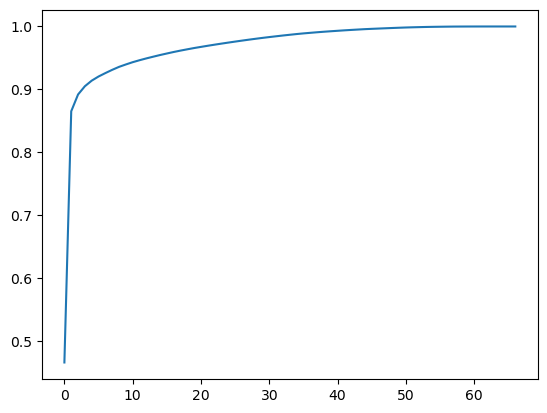

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## MUTAL INFORMATION GAIN

In [18]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(scaled_data,y)
mutual_info

array([0.07720363, 0.35376408, 0.07032538, 0.00715425, 0.00933915,
       0.04319966, 0.02204862, 0.01906439, 0.04123185, 0.01472209,
       0.39686675, 0.09004389, 0.09170245, 0.01941413, 0.00584087,
       0.00351003, 0.03344311, 0.09453738, 0.08188229, 0.07977574,
       0.09124663, 0.08968025, 0.09226591, 0.07042542, 0.05806022,
       0.01285053, 0.03932242, 0.03874358, 0.01877114, 0.01888944,
       0.00450535, 0.0200887 , 0.03107359, 0.02531091, 0.02029972,
       0.01006759, 0.0079155 , 0.00678127, 0.00288386, 0.01986346,
       0.02115367, 0.02404898, 0.01462114, 0.02425655, 0.00707413,
       0.00344053, 0.01375185, 0.00388144, 0.00113649, 0.00401435,
       0.00236364, 0.0027592 , 0.00318584, 0.00399647, 0.00377264,
       0.33911796, 0.06664225, 0.0527875 , 0.08496644, 0.01944115,
       0.02112996, 0.04164154, 0.34645612, 0.34391931, 0.04539397,
       0.00212637, 0.00131536])

In [19]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = scaled_data.columns
mutual_info.sort_values(ascending=False).head(30)

LoanCurrentDaysDelinquent             0.396867
LoanStatus                            0.353764
LP_GrossPrincipalLoss                 0.346456
LP_NetPrincipalLoss                   0.343919
LoanFirstDefaultedCycleNumber         0.339118
BorrowerAPR                           0.094537
EstimatedReturn                       0.092266
LoanNumber                            0.091702
EstimatedEffectiveYield               0.091247
LoanMonthsSinceOrigination            0.090044
EstimatedLoss                         0.089680
LP_CustomerPrincipalPayments          0.084966
BorrowerRate                          0.081882
LenderYield                           0.079776
CreditGrade                           0.077204
ProsperRating (numeric)               0.070425
ProsperRating (Alpha)                 0.070325
MonthlyLoanPayment                    0.066642
ProsperScore                          0.058060
LP_CustomerPayments                   0.052787
LP_NonPrincipalRecoverypayments       0.045394
EmploymentSta

<AxesSubplot:>

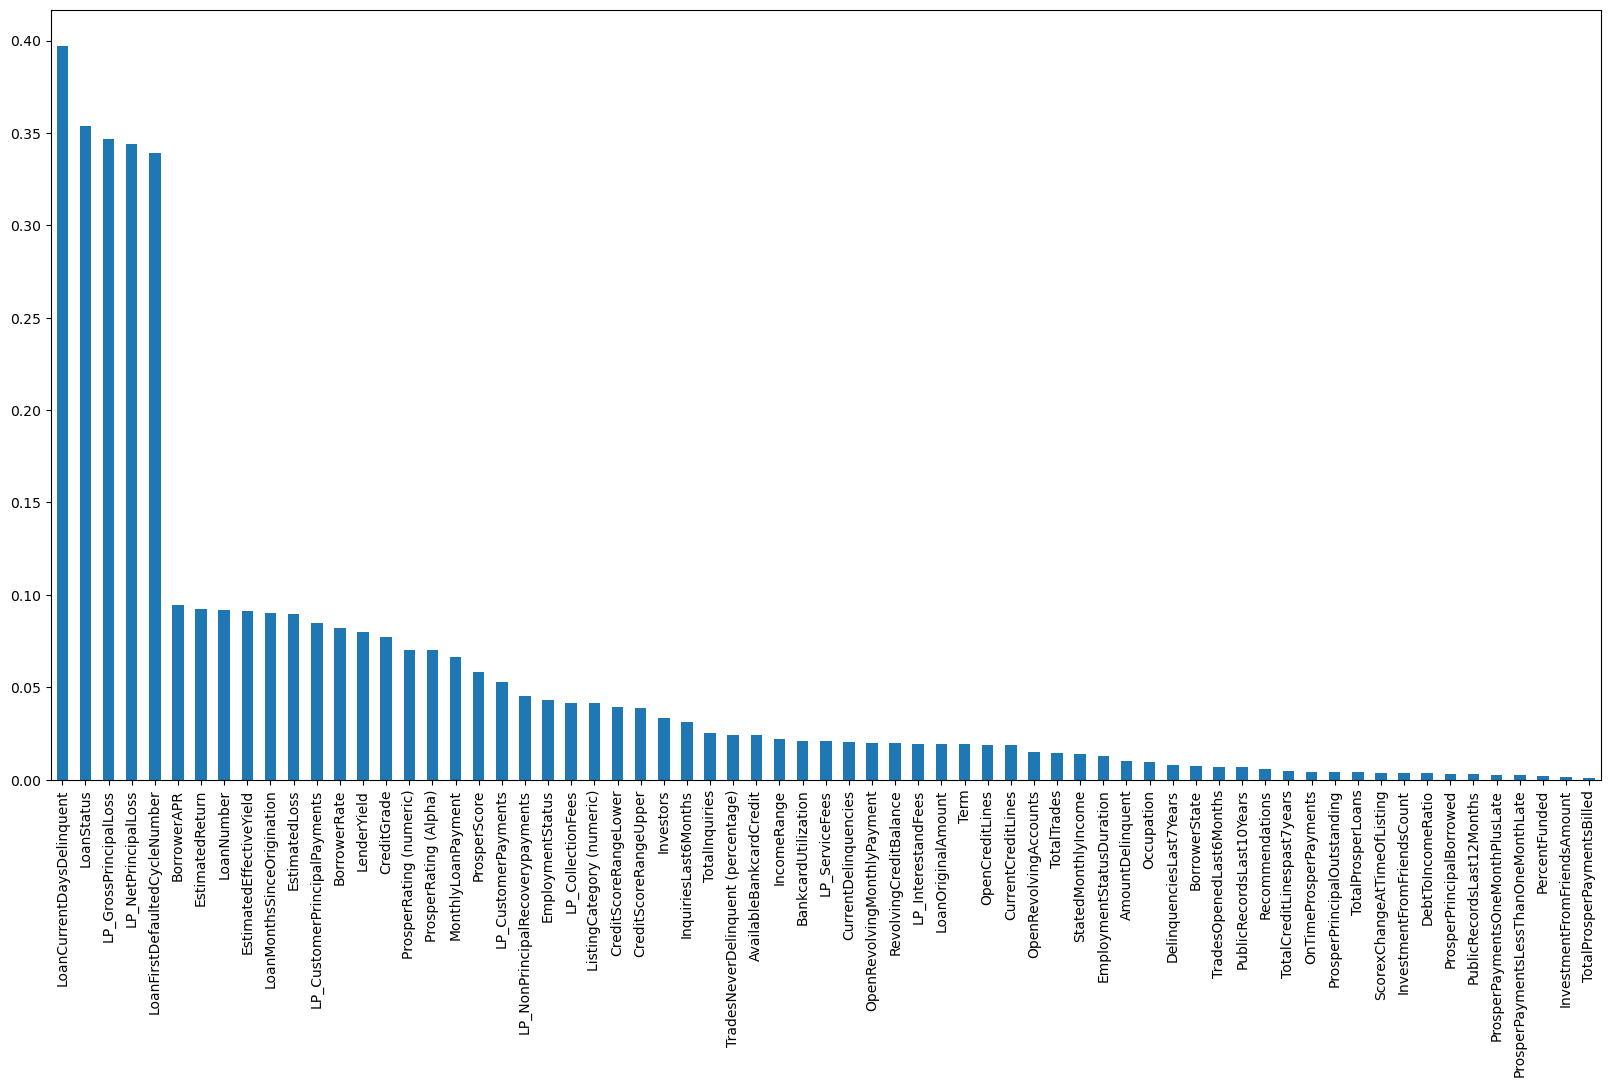

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

### Correlation matrix

In [26]:
correlation_matrix = pd.concat([x,y],axis=1)
correlation_matrix.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,Term,ListingCategory (numeric),OpenRevolvingAccounts,...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,Status
0,C,Completed,not available,CO,Other,Self-employed,"$25,000-49,999",36,0,1,...,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0
1,not available,Current,A,CO,Professional,Employed,"$50,000-74,999",36,2,13,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0
2,HR,Completed,not available,GA,Other,Not available,Not displayed,36,0,0,...,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0
3,not available,Current,A,GA,Skilled Labor,Employed,"$25,000-49,999",36,16,7,...,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0
4,not available,Current,D,MN,Executive,Employed,"$100,000+",36,2,6,...,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0


In [27]:
corr = correlation_matrix.corr()
corr

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,Status
Term,1.000000,0.004947,0.093637,-0.134134,-0.342130,0.335610,0.338927,-0.056680,-0.043507,-0.045137,...,-0.128255,0.158890,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.024472,-0.127260
ListingCategory (numeric),0.004947,1.000000,-0.073184,-0.101629,-0.198650,0.123803,-0.127130,-0.028031,-0.018968,-0.073996,...,-0.062050,-0.030451,0.034189,0.019839,-0.054002,-0.053068,-0.027700,-0.011688,-0.013096,-0.067652
OpenRevolvingAccounts,0.093637,-0.073184,1.000000,-0.109019,-0.213493,0.232300,0.233128,-0.011529,-0.008483,0.049841,...,0.019077,0.023936,-0.068737,0.027315,-0.030861,-0.029984,-0.013767,-0.000285,-0.005228,-0.116267
LoanCurrentDaysDelinquent,-0.134134,-0.101629,-0.109019,1.000000,0.419305,-0.370407,-0.097021,0.063427,0.030843,0.081734,...,-0.100597,0.008295,0.054951,-0.133772,0.534058,0.533930,0.183147,0.009926,0.023622,0.819239
LoanMonthsSinceOrigination,-0.342130,-0.198650,-0.213493,0.419305,1.000000,-0.944216,-0.309058,0.146977,0.110114,0.258590,...,0.302405,0.158185,-0.088922,-0.105254,0.251267,0.246567,0.107535,0.013106,0.065337,0.383344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP_NetPrincipalLoss,-0.035981,-0.053068,-0.029984,0.533930,0.246567,-0.246192,0.127408,0.040897,0.020350,0.216049,...,-0.065624,0.112232,-0.044368,-0.148895,0.992821,1.000000,0.206985,-0.013578,0.028301,0.652737
LP_NonPrincipalRecoverypayments,-0.034157,-0.027700,-0.013767,0.183147,0.107535,-0.096956,0.024310,0.016845,0.010109,0.066970,...,-0.013764,0.052604,-0.041250,-0.623109,0.259727,0.206985,1.000000,0.000776,0.018604,0.206800
PercentFunded,-0.028806,-0.011688,-0.000285,0.009926,0.013106,0.018372,-0.010248,0.009604,0.001622,-0.049716,...,-0.041057,-0.066877,0.069591,0.006186,-0.013144,-0.013578,0.000776,1.000000,0.003338,-0.007219
InvestmentFromFriendsAmount,-0.024472,-0.013096,-0.005228,0.023622,0.065337,-0.056047,0.020351,0.322062,0.483506,0.012178,...,0.075096,0.044460,-0.056675,-0.010141,0.028762,0.028301,0.018604,0.003338,1.000000,0.018264


<AxesSubplot:>

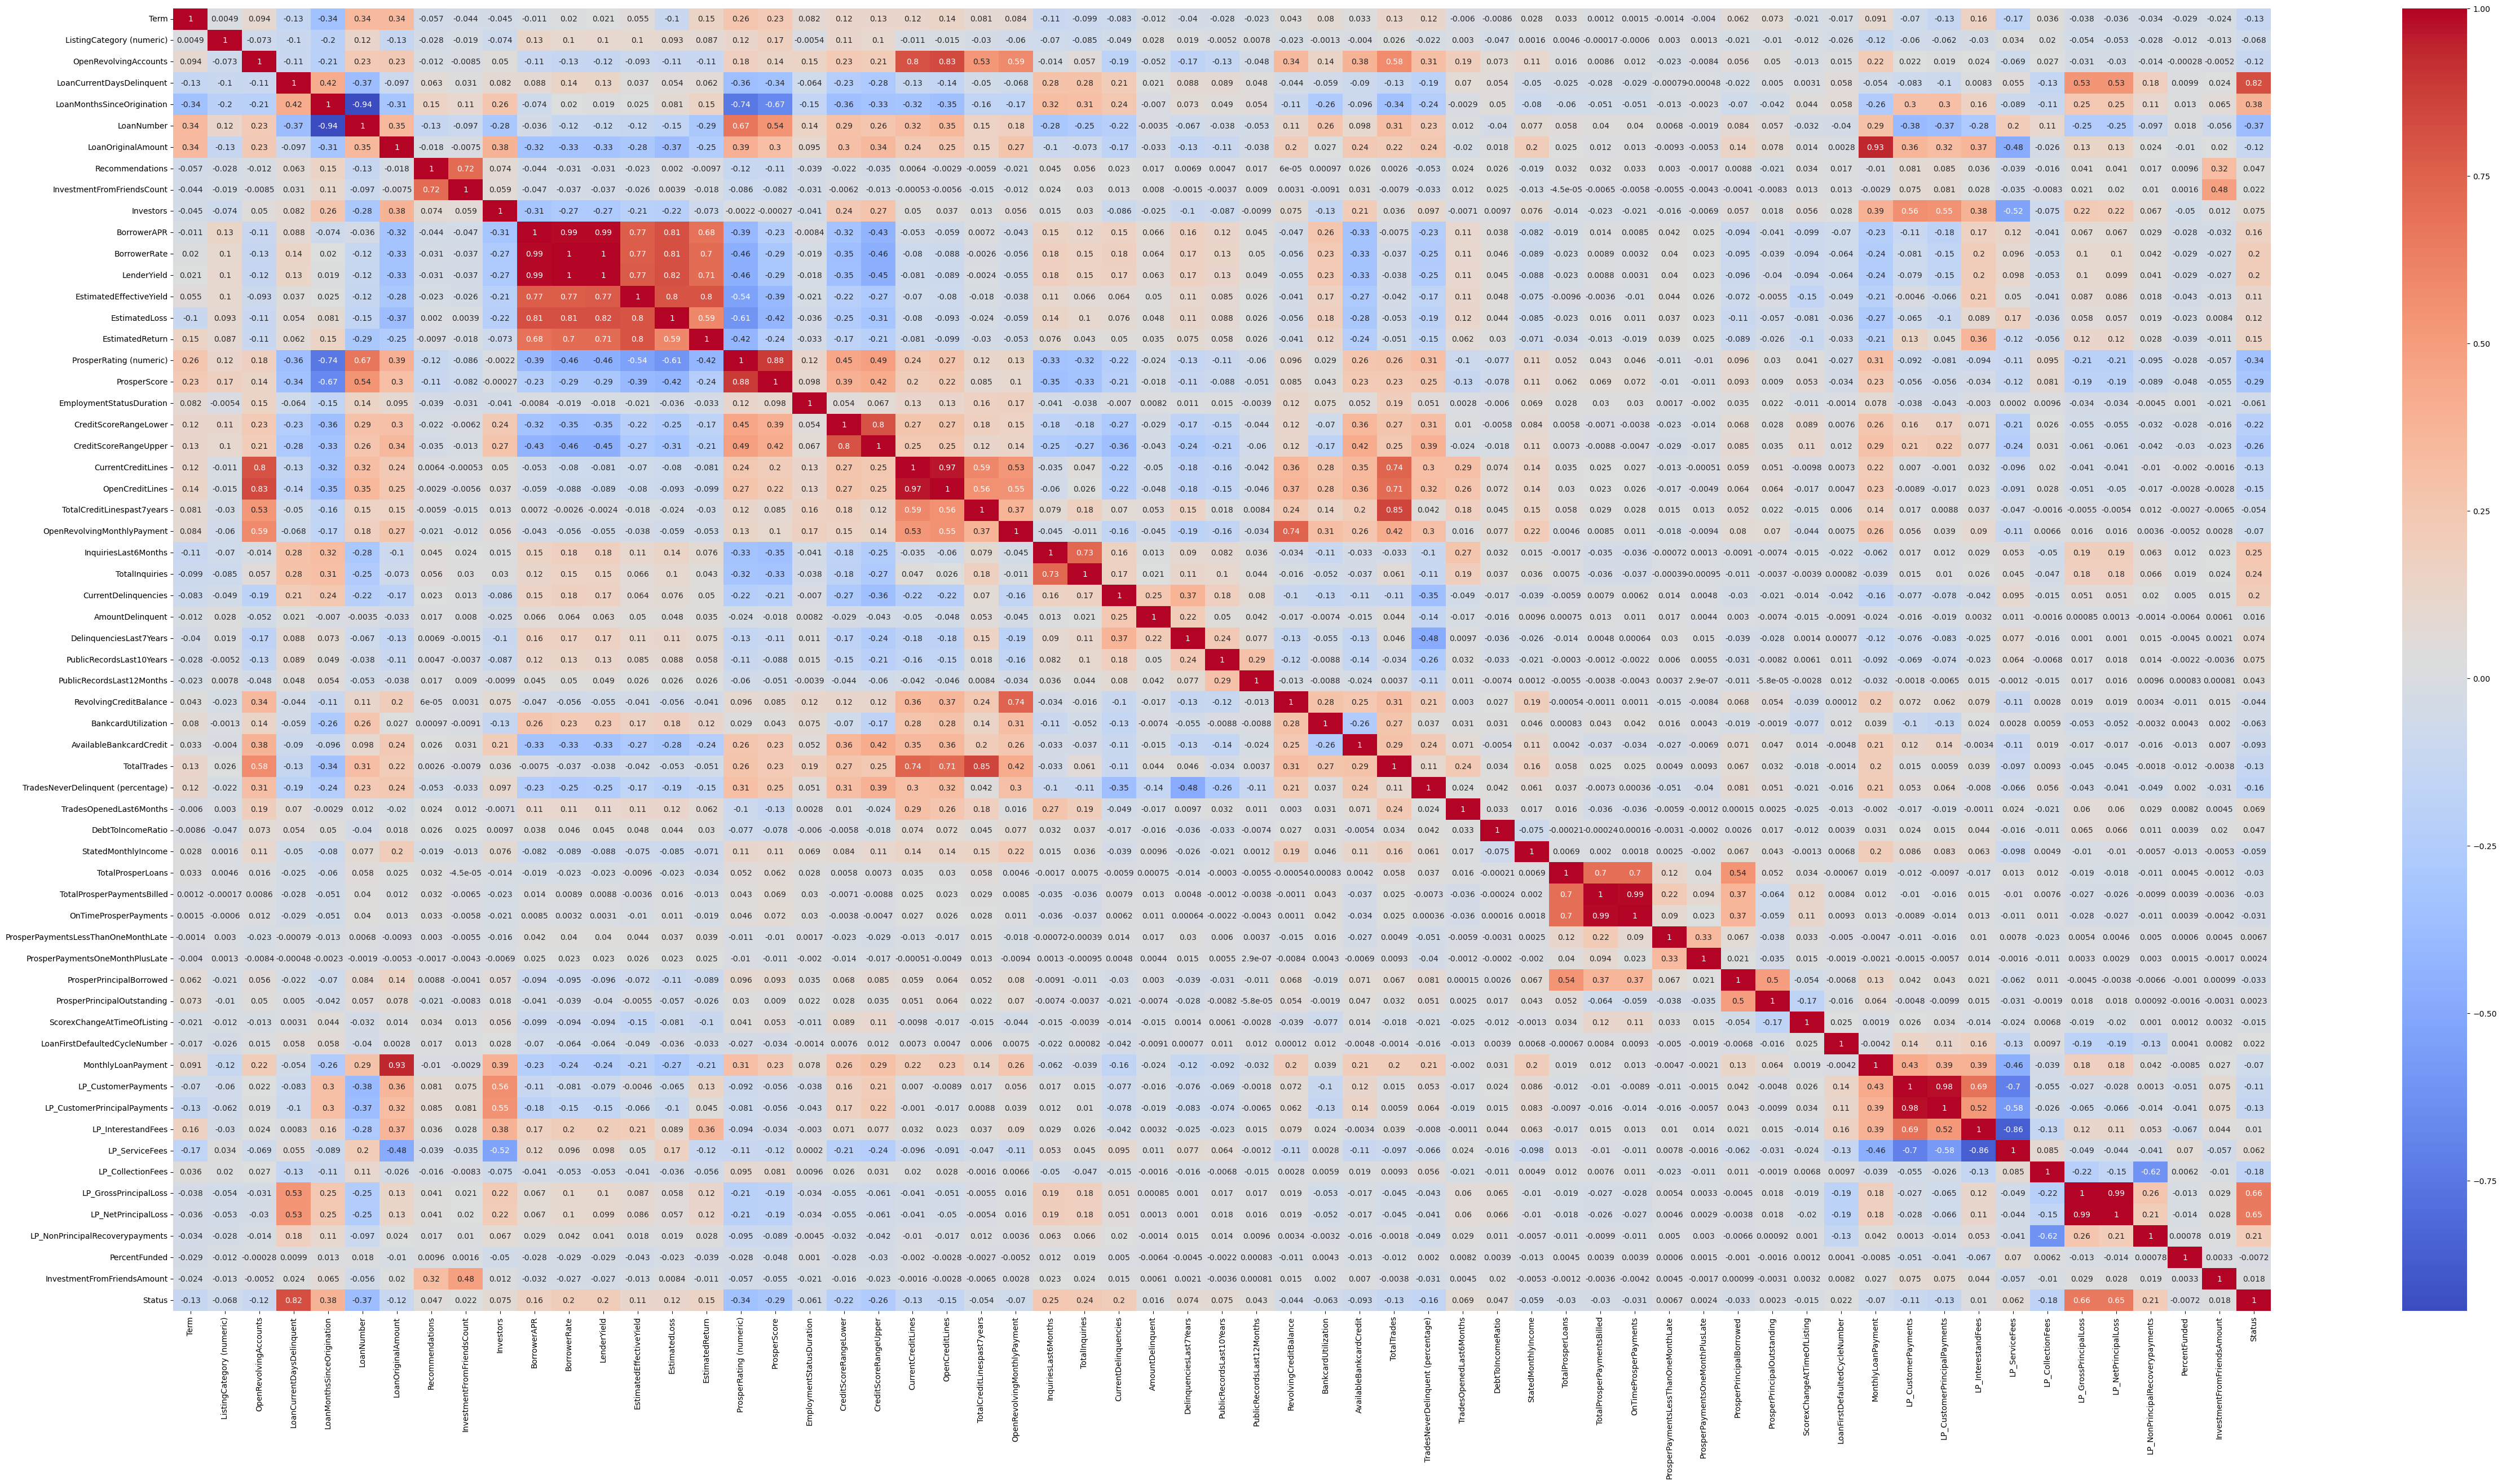

In [32]:
# display correlation matrix in heatmap
corr = correlation_matrix.corr()
plt.figure(figsize=(60,30))
sns.heatmap(corr, annot=True, cmap='coolwarm')